![](../doc/pics/GPK_BME_MOGI.png)
# Contact result plotting
In this notebook the deep dense neural network trained to recognise the dog's physical contact is applied to the measurement results. The model's prediction and the human annotator's behaviour classification can be compared on a plot.

Notebook written by András Zöllner, [zollner.andras@gmail.com](mailto:zollner.andras@gmail.com)

## Importing the needed tools
Firstly the tensorflow and data processing tools are imported

In [1]:
#imports
#tensorflow imports
import tensorflow as tf
from tensorflow import keras

from dataprocess import * #for EtoData class

import matplotlib.pyplot as plt #for plotting
import numpy as np

## Loading the measurement data and the neural network

In this case the network inputs are:
- owner: distance from dog, relative rotation compared to dog's rotation, is in room ? 
- stranger: distance from dog, relative rotation compared to dog's rotation, is in room ? 
- owner's and stranger's hand: distance from dog, relative rotation compared to dog's rotation

In [2]:
#loading the data from files and consturcting the myData EtoData instance
mocapy_file = "../log/Husky_02-processed [MISLABELED EPISODES].csv" #path of the mocapy csv file
video_file = "../log/vid_tags_time_refined.csv" #path of the solomon coder csv file
myData = EtoData(mocapy_file,video_file) #construct the myData instace of the EtoData class

In [3]:
#loading the keras neural network
model_path = "../models/contact_model"
model = keras.models.load_model(model_path)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2

In [4]:
#load the input data and the tags
x = myData.get_preproc_cols(col_names=["OWN_d", "OWN_r", "STR_d", "STR_r", "OHA_d", "OHA_r", "SHA_d", "SHA_r", "OWN_is_in_room", "STR_is_in_room"])
y = myData.get_preproc_cols(col_names=["Contact"])
print(x.shape)
print(y.shape)

(47590, 10)
(47590, 1)


In [5]:
#predict y values with tensorflow
y_pred = np.argmax(model.predict(x), axis=-1)

In [6]:
#printing the shapes
print(x.shape)
print(y.shape)
print(y_pred.shape)

(47590, 10)
(47590, 1)
(47590,)


## Plotting the results

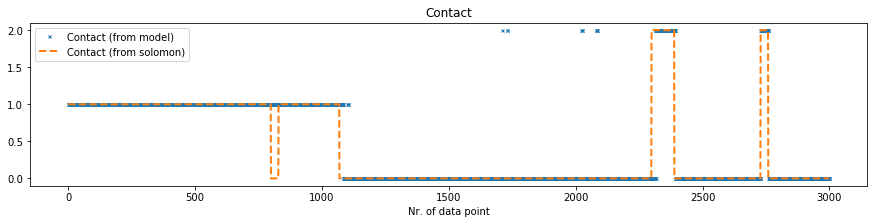

In [10]:
#plotting the results
s = 9000
e = 12000

plt.figure(figsize=[15,3])
plt.title("Contact")
plt.plot(y_pred[s:e], 'x', linewidth=2, markersize=3, label="Contact (from model)")
plt.plot(y[s:e, 0], '--', linewidth=2, markersize=12, label="Contact (from solomon)")
plt.xlabel("Nr. of data point")
plt.axis([None, None, None, None])
plt.legend()
plt.savefig('contact.png',dpi=300, bbox_inches = "tight")
plt.show()

In [25]:
print(myData.contact_dict)

{0: None, 1: 'Contact with OWN', 2: 'Contact with STR'}
